Recap 

So notebooks with vispy on top of webGL looks like a great solution.
We need to be able to demonstrate:
* authentication (no access to other people's data)
* handling of large dataset (we are moving towards HDF5)
* viewing slices (1, 2 or 3D) of datasets of high dimensionality (4,5D)
* scripting capability (remotely)


Jupyter & IPython, A tool for scientific workflow.

The Jupyter/IPython Project and it particular one of the frontend known as the notebook is the perfect polyglot tool for scientific computation workflows. The next stable version of the tools will enable for the first time real multi-user usage and in perfect for data analysis on large remote dataset and interactive exploration with a single installation on a lab cluster.

I will show some of the current features of the Jupyter/IPython notebook (multilanguage, rich representation, interactive widgets...) as well as demonstrate the current state of the multi-user integration and architecture. Discuss the curent and futur state of authentication, data sharing model, scalability. 

I'll also discuss the future developement plan and projected feature like real-time colaboration on documents (like google doc/and google drive integgration), evolution of notebook format to integrate better with publishers.



# Jupyter/IPython

## A multi-language architecture for interactive computing

## ESRF- November 2014

###### Bussonnier Matthias

## About Me:

 - A physicit
 - (PhD in BioPhysics)
 - Invoved in IPython/Jupyter for ~3 years now, 
 - PostDoc in UC Berkley at [Berkeley Institute for Data Science](http://bids.berkeley.edu).
     - Work on Software to improve Scientific Workflow.
     - Add Realtime and GDrive integration to notebook

### Quick survey

  - who uses Jupyter/IPython
  - who know vaguely what Jupyter/IPython
  - who does not have a clue

## What is Jupyter/IPython

IPython is a set of tool to go from individual exploratory work to production-scale execution and publication.

<p class='alert alert-warning' style='font-size:120%'>
    What I show here is less than 24 hours old, so expect bugs and change in final version of released software. 
    **Backup** your data if you try.
</p>

Everything is 
 - on github https://github.com/jupyter and https://github.com/IPython  (for latest dev version)
 - BSD And Free
 
If you want to try now:
 - tmpnb.org (you can play with live version)
 - nbviewer.org (see what people are doing)
 - https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks
 

## The team

- UC Berkeley/Cal Poly (full time) 
    - Fernando Perez
    - Brian Granger
    - Min Ragan Kelley
    - Thoma Kluyver
    - Jonathan Frederic 
    - & Me 
   

# Current IPython funding
<img src="fig/Logo_Google.png" width=20%></img>
<img src="fig/sloan-logo.png" width=20%></img>
<img src="fig/rackspace-logo.png" width="20%"></img>
<img src="fig/microsoft-logo.png" width=20%></img>
<img src="fig/simons-logo.png" width=20%></img>
<img src="fig/nsf-logo.png" width=10%></img>



### A bit of history

<div class="slide-header">From a better shell...</div>
### 2001, Fernando Pérez, instead of a Physics dissertation
<center>
<img src="files/fig/ipython_console4.png" width="80%">

https://gist.github.com/fperez/1579699
</center>

<div class="slide-header">... to a fancier shell (and a protocol!)...</div>
## 2010, E Patterson, Enthought

<center>
<img src="files/fig/ipython_qtconsole.png" width="40%">
</center>

<div class="slide-header">As well as 6 notebook attempts in 6 years...</div>
## T. Matev, T. Alatalo, R. Kern, Min RK, J. Gao, B. Granger
<center>
<img src="files/fig/ipython-http.png" width="70%">
</center>

# Not Python only

> “Why is it called IPython, if it can do Julia, R, Haskell, Ruby, ... ?”

And much more.

**IJulia**, **IHaskell**, IFSharp, IRuby, IGo, IScala, IMathics, IAldor, **Calico Project**, Lua Kernel, IRKernel, IErlang, IOCaml, IForth, IPerl, IOctave, IScilab, ICSharp, Bash, Clojure Kernel, Hy Kernel

### Jupyter

Everything which is language agnostic
    
  - Network protocol for interactive computing
  - Clients for protocol
    - Console
    - Qt Console – Notebook
  - Notebook file format & tools (nbconvert...)
  - Nbviewer...

### IPython

- Written in Python
- Supercharged Python Shell
    - "Magics", `?/??`
    - **some** cross language integration
    - rich display protocol
- Some Tools for parallel computing
- ment to become only one kernel that can be used with jupyter.

## A quick introduction to Jupyter Notebook

The Notebook is a web-based interface that allows Interactive code editting and code edditing and execution as webb as inclusion of full paragraph of text and rich math. Example with Python:

In [5]:
location = 'Grenoble'
print('Hello', location)

Hello Grenoble


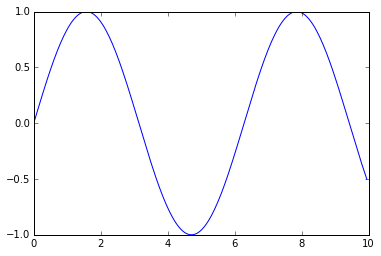

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def pl(ω=1.0):
    x = np.arange(0,10,0.05)
    plt.plot(x, np.sin(ω*x))
    
pl()

In [23]:
from IPython.html.widgets import interact

In [24]:
interact(pl)

### Other rich representation

In [21]:
from IPython.display import display

from sympy.interactive import printing
printing.init_printing(use_latex='mathjax')

from __future__ import division
import sympy as sym
from sympy import *
x, y, z = symbols("x y z")
f, g, h = map(Function, 'fgh')

In [22]:
Rational(3,2)*pi + exp(I*h(x)) / (g(x)**2 + f(y))

         ⅈ⋅h(x)   
3⋅π     ℯ         
─── + ────────────
 2            2   
      f(y) + g (x)

## A taste of interactivity

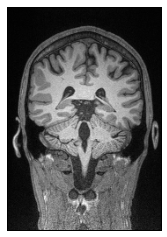

In [24]:
# adapted from a Scott Burns' example.
import matplotlib
matplotlib.rc('figure', figsize=(8,6))
%matplotlib inline

from brain_viewer import viewer

brain = 'MPRAGE.nii.gz' # this is a T1 image of Scott brain
viewer(brain)

## 3D visualisation

3D Visualisation is possible in the notebook using WebGL/[VisPy](./webgl_example_1.ipynb).

VisPy Code Camp at ESRF [last Feb](http://cyrille.rossant.net/back-from-our-first-vispy-code-camp-at-esrf/)

[Example]([VisPy](./webgl_example_1.ipynb)

## Multilanguage

2 types of multi language which are radically differents

- Native Kernel 
    - Python,
    - [Julia](http://localhost:8888/tree/talks/Julia-EuroSciPy14)
    - Haskell,
    - OCaml
    - ,...15+)
    
- Kernel specific binding
    - IPython [magics](Interactive%20Fortran.ipynb)
    - Julia PyCall, ccall...

# Sharing

### nbconvert

Nbconvert is a library which allow conversion from .ipynb to html, latex, pdf, rst, py .... (etc).
it is availlable 'as a service' on [nbviwer.org](http://nbviewer.org) with tight integration into github.


## Interactivity in static view

- http://nbviewer.ipython.org/url/jakevdp.github.com/downloads/notebooks/mpld3Demo.ipynb

# Architecture and Multi Users

Architecture of the notebook

![img](notebook_components.png)

- Each box can be on a different machine
- Each Box can be containerized
- The notion of what is where can be confusing for end-user.
- Recent technology do not work on  all networks :
    - 3 ØMQ and 3 websockets sockets/kernel (file desccriptor limit) 
    - websocket IE ≥ 10

## Multi User

Work in progress usable/used now
  - Even more recent tech (nodejs)
  - Slightly in flux
  - still limitted doc
  - MVP
  
Frontend capable of spawning Single User servers and redirect to it.
  - Unix permission
  - Unix Login
  - Only spawn SU on local machine.
  
Each piece can be replaced, 
  - Comunity prototype of OAuth login
  - Comunity prototype of Docker Spawner
  
Used now:
  - tmpnb.org
  - [nature demo](http://www.nature.com/news/interactive-notebooks-sharing-the-code-1.16261)
  - bryn mawr college [CS teaching](http://jupyter.cs.brynmawr.edu/hub/dblank/public)

## Future

- in browser terminal
- in browser editor 
- real-time colaboration
- static widgets
